In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [21]:
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/hack-isomipinit'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC

basee2 = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/archive'
def open_filesold(label):
    base = basee2 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog


In [4]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


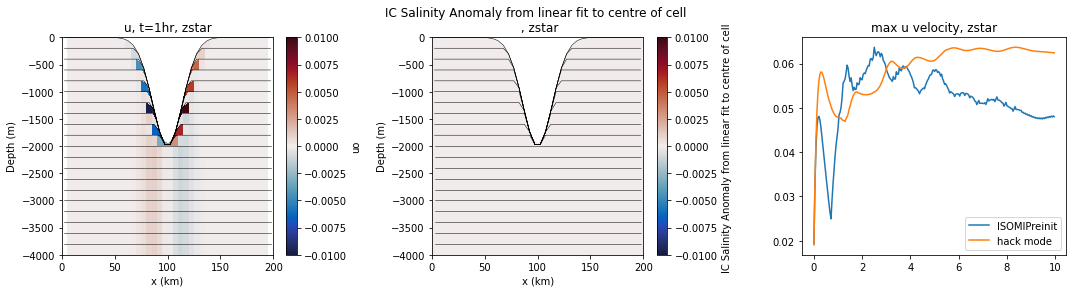

In [31]:
label = 'zstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'ISOMIPreinit')
axes[2].set_title('max u velocity, '+label)
prog2 = open_filesold('zstar-isomip-surfp-hack')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'hack mode')
axes[2].legend()
fig.subplots_adjust(wspace = 0.4)

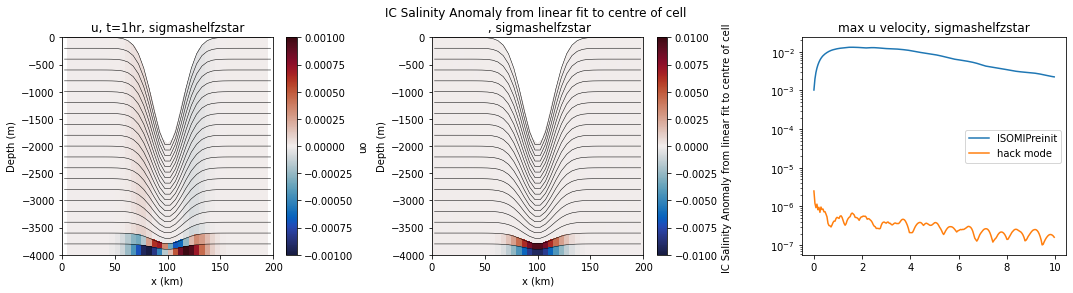

In [32]:
label = 'sigmashelfzstar'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance, ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'ISOMIPreinit')
axes[2].set_title('max u velocity, '+label)
prog2 = open_filesold('sigma-isomip-hack')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'hack mode')
axes[2].legend()
axes[2].set_yscale('log')

fig.subplots_adjust(wspace = 0.4)

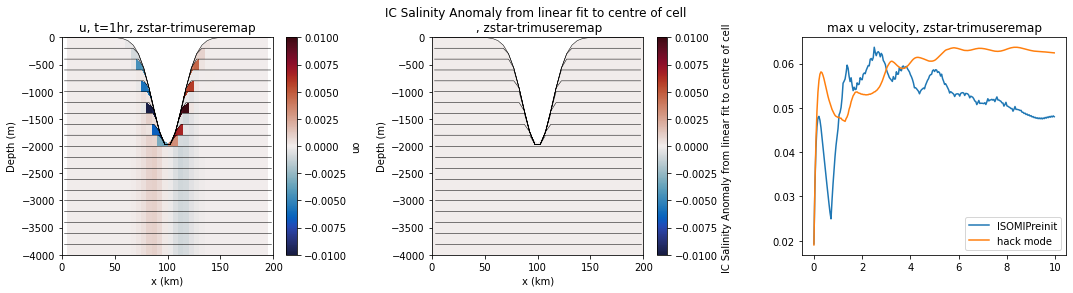

In [33]:
label = 'zstar-trimuseremap'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'ISOMIPreinit')
axes[2].set_title('max u velocity, '+label)
prog2 = open_filesold('zstar-isomip-surfp-hack')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'hack mode')
axes[2].legend()
fig.subplots_adjust(wspace = 0.4)

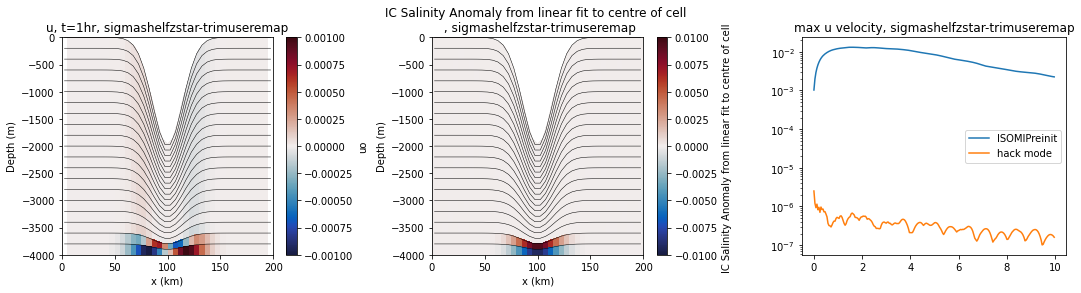

In [34]:
label = 'sigmashelfzstar-trimuseremap'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance, ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'ISOMIPreinit')
axes[2].set_title('max u velocity, '+label)
prog2 = open_filesold('sigma-isomip-hack')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'hack mode')
axes[2].legend()
axes[2].set_yscale('log')

fig.subplots_adjust(wspace = 0.4)